An imageis acolleciton of scalers in a regular grid, multiple clara per grid would represent as a grayscale image.

In [1]:
import imageio

image_arr = imageio.imread('./torracat.png')

In [2]:
image_arr.shape

(256, 256, 4)

In [3]:
# changing the layout 
# of the function using permute
import torch

img = torch.from_numpy(image_arr)
out = img.permute(2,0,1)

In [4]:
out.shape

torch.Size([4, 256, 256])

In [5]:
batch_size = 3
batch = torch.zeros(batch_size, 3, 256, 256, dtype=torch.uint8)

This indicates that our batch will consist of three RGB images 256 pixels in height and
256 pixels in width. Notice the type of the tensor: we’re expecting each color to be represented as an 8-bit integer, as in most photographic formats from standard consumer
cameras

In [6]:
import os

data_dir = './'

filenames = [name for name in os.listdir(data_dir) if os.path.splitext(name)[-1]=='.png']
for i , filename in enumerate(filenames):
  img_arr = imageio.imread(os.path.join(data_dir, filename))
  img_t = torch.from_numpy(img_arr)
  img_t = img_t.permute(2,0,1)
  img_t = img_t[:3]
  batch[i] = img_t

In [7]:
batch[0]

tensor([[[255, 255, 255,  ..., 255, 255, 255],
         [255, 255, 255,  ..., 255, 255, 255],
         [255, 255, 255,  ..., 255, 255, 255],
         ...,
         [255, 255, 255,  ..., 255, 255, 255],
         [255, 255, 255,  ..., 255, 255, 255],
         [255, 255, 255,  ..., 255, 255, 255]],

        [[255, 255, 255,  ..., 255, 255, 255],
         [255, 255, 255,  ..., 255, 255, 255],
         [255, 255, 255,  ..., 255, 255, 255],
         ...,
         [255, 255, 255,  ..., 255, 255, 255],
         [255, 255, 255,  ..., 255, 255, 255],
         [255, 255, 255,  ..., 255, 255, 255]],

        [[255, 255, 255,  ..., 255, 255, 255],
         [255, 255, 255,  ..., 255, 255, 255],
         [255, 255, 255,  ..., 255, 255, 255],
         ...,
         [255, 255, 255,  ..., 255, 255, 255],
         [255, 255, 255,  ..., 255, 255, 255],
         [255, 255, 255,  ..., 255, 255, 255]]], dtype=torch.uint8)

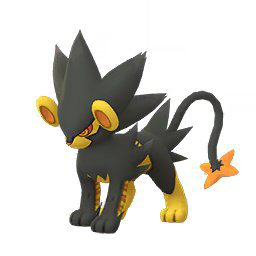

In [8]:
import torchvision

torchvision.transforms.ToPILImage()(batch[0])
# nice

### Normalising the data

In [9]:
#  one way is to simply devide the values of pixels by 255

batch = batch.float()

batch /= 255.0

In [10]:
batch.shape

torch.Size([3, 3, 256, 256])

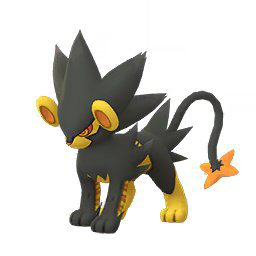

In [11]:
torchvision.transforms.ToPILImage()(batch[0])

In [12]:
# another way is tthat the output should have zero mean and unit standard deviation accross each channel

n_channels = batch.shape[1]
print(n_channels)
for c in range(n_channels):
  mean = torch.mean(batch[:,c])
  std = torch.std(batch[:,c])
  batch[:,c] = (batch[:,c] - mean)/ std

3


In [13]:
batch.shape

torch.Size([3, 3, 256, 256])

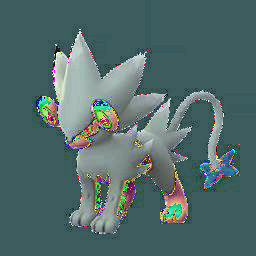

In [14]:
torchvision.transforms.ToPILImage()(batch[0])

### 3D images Volumetric data - Loading a dicom image

in ct scans you have the entirehuman body data takenn in slices from head to toe

In [15]:
!wget https://www.rubomedical.com/dicom_files/dicom_viewer_0015.zip

--2021-01-29 01:12:54--  https://www.rubomedical.com/dicom_files/dicom_viewer_0015.zip
Resolving www.rubomedical.com (www.rubomedical.com)... 5.175.26.80
Connecting to www.rubomedical.com (www.rubomedical.com)|5.175.26.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 522762 (511K) [application/x-zip-compressed]
Saving to: ‘dicom_viewer_0015.zip’

dicom_viewer_0015.z 100%[===================>] 510.51K  1008KB/s    in 0.5s    

2021-01-29 01:12:55 (1008 KB/s) - ‘dicom_viewer_0015.zip’ saved [522762/522762]



In [16]:
! unzip dicom_viewer_0015.zip

Archive:  dicom_viewer_0015.zip
  exploding: 0015.DCM                


In [17]:
dir_path = '/content/0015.DCM'

In [18]:
vol_arr =  imageio.volread(dir_path, 'DICOM')
vol_arr.shape

Reading DICOM (examining files): 1/25 files (4.0%)25/25 files (100.0%)
  Found 1 correct series.


(1024, 1024)

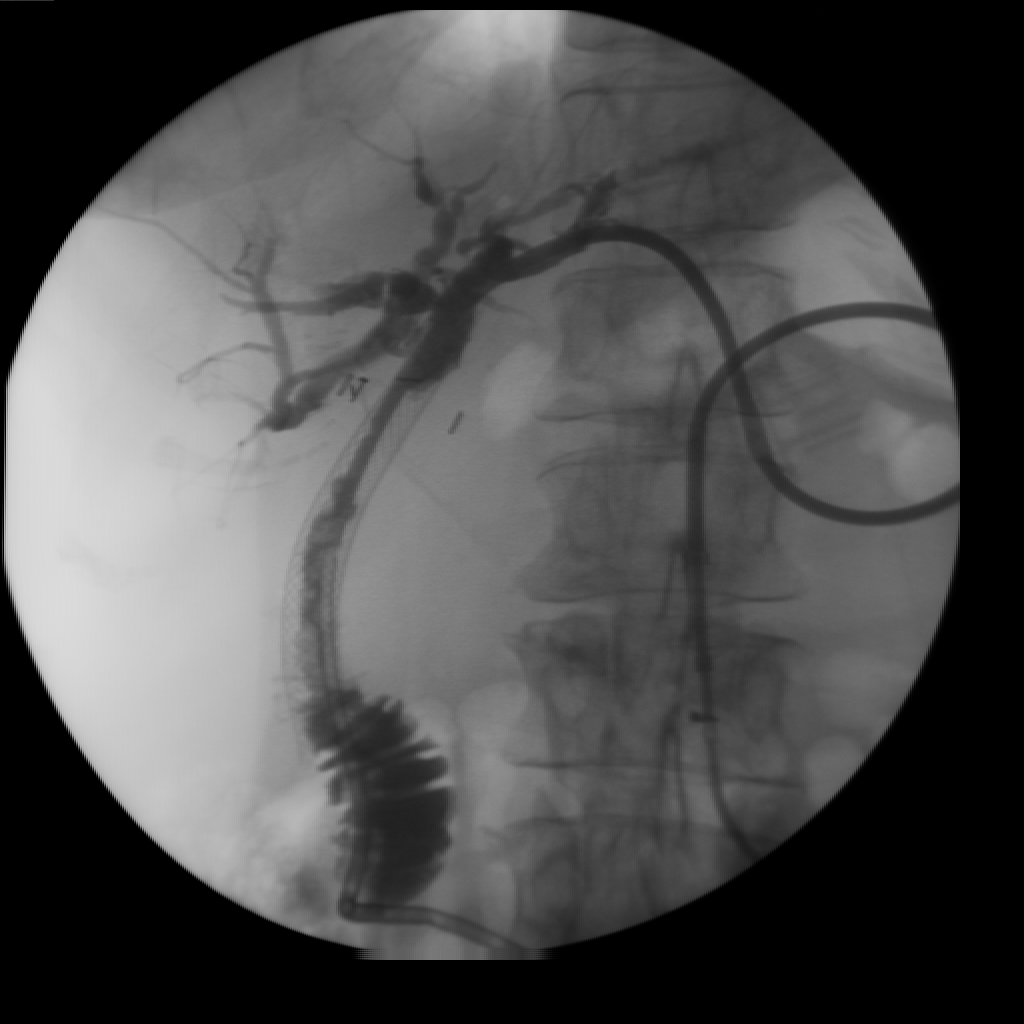

In [19]:
torchvision.transforms.ToPILImage()(vol_arr)

In [20]:
# since there is no channel information we need to use unsqueeze

vol = torch.from_numpy(vol_arr).float()
vol = torch.unsqueeze(vol, 0)
vol.shape

torch.Size([1, 1024, 1024])

### Representing tabular data

In [21]:
# getting wine data set

!wget http://mng.bz/90Ol --no-check-certificate

--2021-01-29 01:12:55--  http://mng.bz/90Ol
Resolving mng.bz (mng.bz)... 35.166.24.88
Connecting to mng.bz (mng.bz)|35.166.24.88|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://mng.bz/90Ol [following]
--2021-01-29 01:12:56--  https://mng.bz/90Ol
Connecting to mng.bz (mng.bz)|35.166.24.88|:443... connected.
  Unable to locally verify the issuer's authority.
HTTP request sent, awaiting response... 301 
Location: https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv [following]
--2021-01-29 01:12:56--  https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 264426 (258K) [application/x-httpd-php]
Saving to: ‘90Ol’

90Ol                100%[==============

In [22]:
import csv, numpy as np

wine_path = '/content/90Ol'

# col_index = [0,1,2,7,8,10]
# titanic_numpy = np.loadtxt(titanic_path, dtype=np.float32, delimiter=",", skiprows=1, usecols=col_index)
# titanic_numpy
wineq_numpy = np.loadtxt(wine_path, dtype=np.float32, delimiter=";", skiprows=1)

wineq_numpy


array([[ 7.  ,  0.27,  0.36, ...,  0.45,  8.8 ,  6.  ],
       [ 6.3 ,  0.3 ,  0.34, ...,  0.49,  9.5 ,  6.  ],
       [ 8.1 ,  0.28,  0.4 , ...,  0.44, 10.1 ,  6.  ],
       ...,
       [ 6.5 ,  0.24,  0.19, ...,  0.46,  9.4 ,  6.  ],
       [ 5.5 ,  0.29,  0.3 , ...,  0.38, 12.8 ,  7.  ],
       [ 6.  ,  0.21,  0.38, ...,  0.32, 11.8 ,  6.  ]], dtype=float32)

In [23]:
col_list = next(csv.reader(open(wine_path), delimiter=';'))
col_list, type(col_list)

(['fixed acidity',
  'volatile acidity',
  'citric acid',
  'residual sugar',
  'chlorides',
  'free sulfur dioxide',
  'total sulfur dioxide',
  'density',
  'pH',
  'sulphates',
  'alcohol',
  'quality'],
 list)

In [24]:
import torchvision 
import torch

In [25]:
# converting to tensor from numpy

wineq = torch.from_numpy(wineq_numpy)

wineq.shape, wineq.dtype

(torch.Size([4898, 12]), torch.float32)

### Representing scores

We can treat the score as a continous variable, keeping it as a real number and performing a regression task.

or try and make it a label and use classification task.

### Taking labels to be continuous

In [26]:
data = wineq[:, :-1]
data, data.shape

(tensor([[ 7.0000,  0.2700,  0.3600,  ...,  3.0000,  0.4500,  8.8000],
         [ 6.3000,  0.3000,  0.3400,  ...,  3.3000,  0.4900,  9.5000],
         [ 8.1000,  0.2800,  0.4000,  ...,  3.2600,  0.4400, 10.1000],
         ...,
         [ 6.5000,  0.2400,  0.1900,  ...,  2.9900,  0.4600,  9.4000],
         [ 5.5000,  0.2900,  0.3000,  ...,  3.3400,  0.3800, 12.8000],
         [ 6.0000,  0.2100,  0.3800,  ...,  3.2600,  0.3200, 11.8000]]),
 torch.Size([4898, 11]))

In [27]:
target = wineq[:, -1]
target, target.shape

(tensor([6., 6., 6.,  ..., 6., 7., 6.]), torch.Size([4898]))

In [28]:
# we want to transform the target tensor in a tensor of labels
# first is simply to treat labels as an integer vector of scores
target = wineq[:,-1].long()
target

tensor([6, 6, 6,  ..., 6, 7, 6])

### one hot encoding

The other approach is to build a one-hot encoding of the scores: that is, encode each of
the 10 scores in a vector of 10 elements, with all elements set to 0 but one, at a different index for each score. This way, a score of 1 could be mapped onto the vector
(1,0,0,0,0,0,0,0,0,0), a score of 5 onto (0,0,0,0,1,0,0,0,0,0), and so on.

In [29]:
target_onehot = torch.zeros(target.shape[0], 10)
target_onehot

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [30]:
target_onehot.scatter_(1, target.unsqueeze(1), 1.0)

# it will put ones err.. scatteringly

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 1., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

### looking at what scatter does
As you learned in the previous chapter, this is a convention in PyTorch that indicates
the method will not return a new tensor, but will instead modify the tensor in place.
The arguments for scatter_ are as follows:
 The dimension along which the following two arguments are specified
 A column tensor indicating the indices of the elements to scatter
 A tensor containing the elements to scatter or a single scalar to scatter (1, in
this case)
In other words, the previous invocation reads, “For each row, take the index of the target label (which coincides with the score in our case) and use it as the column index
to set the value 1.0.” The end result is a tensor encoding categorical information.
 The second argument of scatter_, the index tensor, is required to have the same
number of dimensions as the tensor we scatter into. Since target_onehot has two
dimensions (4,898 × 10), we need to add an extra dummy dimension to target using
unsqueeze,The call to unsqueeze adds a singleton dimension, from a 1D tensor of 4,898 elements
to a 2D tensor of size (4,898 × 1), without changing its contents—no extra elements
are added; we just decided to use an extra index to access the elements. That is, we
access the first element of target as target[0] and the first element of its
unsqueezed counterpart as target_unsqueezed[0,0]


In [31]:
# lets look at it with further detail
print(target.shape[0])

4898


In [32]:
target.unsqueeze(1)

tensor([[6],
        [6],
        [6],
        ...,
        [6],
        [7],
        [6]])

In [33]:
target

tensor([6, 6, 6,  ..., 6, 7, 6])

In [34]:
a = torch.zeros(5, 5)

tensor types: https://pytorch.org/docs/stable/tensors.html

In [35]:
a_t =  torch.LongTensor([1,2,3,4])
a_t.unsqueeze(1)
# adds another dimension to all elements

tensor([[1],
        [2],
        [3],
        [4]])

In [36]:
a_t

tensor([1, 2, 3, 4])

In [37]:
a.scatter_(1, a_t.unsqueeze(1), 1.0)

tensor([[0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0.]])

### numerical statistics

In [40]:
data_mean = torch.mean(data, dim=0)
data_mean

tensor([6.8548e+00, 2.7824e-01, 3.3419e-01, 6.3914e+00, 4.5772e-02, 3.5308e+01,
        1.3836e+02, 9.9403e-01, 3.1883e+00, 4.8985e-01, 1.0514e+01])

In [42]:
data_var = torch.var(data, dim=0)
data_var

tensor([7.1211e-01, 1.0160e-02, 1.4646e-02, 2.5726e+01, 4.7733e-04, 2.8924e+02,
        1.8061e+03, 8.9455e-06, 2.2801e-02, 1.3025e-02, 1.5144e+00])

, dim=0 indicates that the reduction is performed along dimension 0. At
this point, we can normalize the data by subtracting the mean and dividing by the
standard deviation, which helps with the learning process

In [44]:
data_normalized = (data-data_mean) / torch.sqrt(data_var)
data_normalized

tensor([[ 1.7208e-01, -8.1761e-02,  2.1326e-01,  ..., -1.2468e+00,
         -3.4915e-01, -1.3930e+00],
        [-6.5743e-01,  2.1587e-01,  4.7996e-02,  ...,  7.3995e-01,
          1.3422e-03, -8.2419e-01],
        [ 1.4756e+00,  1.7450e-02,  5.4378e-01,  ...,  4.7505e-01,
         -4.3677e-01, -3.3663e-01],
        ...,
        [-4.2043e-01, -3.7940e-01, -1.1915e+00,  ..., -1.3130e+00,
         -2.6153e-01, -9.0545e-01],
        [-1.6054e+00,  1.1666e-01, -2.8253e-01,  ...,  1.0049e+00,
         -9.6251e-01,  1.8574e+00],
        [-1.0129e+00, -6.7703e-01,  3.7852e-01,  ...,  4.7505e-01,
         -1.4882e+00,  1.0448e+00]])

### Finding thesholds

Loooking at datato easily tell data apart

In [45]:
bad_indexes = target <= 3 # comparison function provided by pytorch
bad_indexes.shape, bad_indexes.dtype, bad_indexes.sum()

(torch.Size([4898]), torch.bool, tensor(20))

In [46]:
# lets group  
bad_data = data[bad_indexes]
bad_data.shape

torch.Size([20, 11])

Note that the new bad_data tensor has 20 rows, the same as the number of rows with
True in the bad_indexes tensor. It retains all 11 columns. Now we can start to get
information about wines grouped into good, middling, and bad categories. 

In [49]:
bad_data = data[target <= 3]
mid_data = data[(target > 3 ) & (target < 7)]
good_data = data[target >= 7]

In [50]:
bad_mean= torch.mean(bad_data, dim=0)
mid_mean = torch.mean(mid_data, dim=0)
good_mean = torch.mean(good_data, dim=0)

In [53]:
for i, args in enumerate(zip(col_list, bad_mean, mid_mean, good_mean)):
  print('{:2} {:20} {:6.2f} {:6.2f} {:6.2f}'.format(i, *args))

 0 fixed acidity          7.60   6.89   6.73
 1 volatile acidity       0.33   0.28   0.27
 2 citric acid            0.34   0.34   0.33
 3 residual sugar         6.39   6.71   5.26
 4 chlorides              0.05   0.05   0.04
 5 free sulfur dioxide   53.33  35.42  34.55
 6 total sulfur dioxide 170.60 141.83 125.25
 7 density                0.99   0.99   0.99
 8 pH                     3.19   3.18   3.22
 9 sulphates              0.47   0.49   0.50
10 alcohol               10.34  10.26  11.42


### crude 

It looks like we’re on to something here: at first glance, the bad wines seem to have
higher total sulfur dioxide, among other differences. We could use a threshold on
total sulfur dioxide as a crude criterion for discriminating good wines from bad ones.

In [56]:
total_sulfur_threshold = 141.83
total_sulfur_data = data[:,6]
predicted_indexes = torch.lt(total_sulfur_data, total_sulfur_threshold)
# https://pytorch.org/docs/stable/generated/torch.lt.html#:~:text=Computes%20input%3Cother%20element%2Dwise,broadcastable%20with%20the%20first%20argument.&text=out%20(Tensor%2C%20optional)%20%E2%80%93%20the%20output%20tensor.

predicted_indexes.shape, predicted_indexes.dtype, predicted_indexes.sum()

(torch.Size([4898]), torch.bool, tensor(2727))

In [57]:
actual_indexes= target >5
actual_indexes.shape, actual_indexes.dtype, actual_indexes.sum()

(torch.Size([4898]), torch.bool, tensor(3258))

Since there are about 500 more actually good wines than our threshold predicted, we
already have hard evidence that it’s not perfect. Now we need to see how well our predictions line up with the actual rankings. We will perform a logical “and” between our
prediction indexes and the actual good indexes (remember that each is just an array
of zeros and ones) and use that intersection of wines-in-agreement to determine how
well we did:

In [58]:
n_matches = torch.sum(actual_indexes & predicted_indexes).item()
n_predicted = torch.sum(predicted_indexes).item()
n_actual = torch.sum(actual_indexes).item()

n_matches,n_matches /n_predicted, n_matches /n_actual

(2018, 0.74000733406674, 0.6193984039287906)

We got around 2,000 wines right! Since we predicted 2,700 wines, this gives us a 74%
chance that if we predict a wine to be high quality, it actually is. Unfortunately, there
are 3,200 good wines, and we only identified 61% of them. Well, we got what we
signed up for; that’s barely better than random! Of course, this is all very naive: we
know for sure that multiple variables contribute to wine quality, and the relationships
between the values of these variables and the outcome (which could be the actual
score, rather than a binarized version of it) is likely more complicated than a simple
threshold on a single value.
